# EECS 465/ROB 422: Introduction to Algorithmic Robotics Fall 2024  
# Homework Assignment #2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Questions
1. (5 points) Is a single point convex? Use the definition of convexity to justify your nswer.

Yes, a single point is convex. 
The definition of convexity states that a set of points is convex if for any two points $p$ and $q$ in the set, the line segment connecting them is also in the set. 
In other words, the set of points is convex if the line connecting any two points in the set is also in the set. 

2. (10 points) Is the function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ convex? Use the principles of composition and the common convex functions shown in the lecture to justify your answer.

Yes. The function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ is convex. 
To see this, we can use the following steps:
1. The function is a composition of two convex functions: $|2 − 5x|$, $2x$, and $8e^{(−4x)}$.
2. $|2 − 5x|$ is convex  because it forms a V-shape and $8e^{(−4x)}$ is convex a function because its second derivative is positive.
3. $2x$ is a convex function(a line is both convex and concave) and +1 is a constant function.
4. Therefore, the function $f(x) = (|2 − 5x| + 2x + 8e^{(−4x)})−1$ is convex.

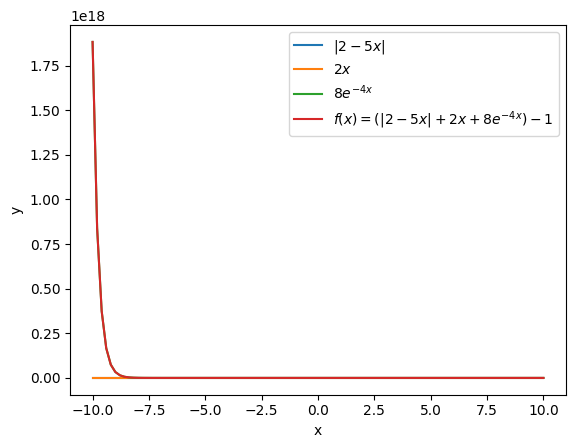

In [2]:
# Plotting the function
x = np.linspace(-10, 10, 100)
y_1 = np.abs(2 - 5*x)
plt.plot(x, y_1, label='$|2 - 5x|$')
y_2 = 2*x
plt.plot(x, y_2, label='$2x$')
y_3 = 8*np.exp(-4*x)
plt.plot(x, y_3, label='$8e^{-4x}$')
y_4 = y_1 + y_2 + y_3 - 1
plt.plot(x, y_4, label='$f(x) = (|2 - 5x| + 2x + 8e^{-4x}) - 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();


3. (10 points) Rewrite the following optimization problem in standard form $(x = [x1,x2]^T)$:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &-4x_2 + 3x_1 - 3\\
\text{subject to} \quad &x_2 \leq -3 \\ 
 &-x_1 - 2 \geq x_1 - 5x_2 \\ 
 &x_2 + 6.3 = x_1 \\ 
 &-x_2 + 5 + 5x_1 \leq 4x_1
\end{aligned}$$

The standard form of an optimization problem is as follows: 
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &f(x) \\ 
 \text{subject to} \quad &g_i(x) \leq 0, i = 1,2,...,m \\ 
 &h_j(x) = 0, j = 1,2,...,p
\end{aligned}$$
where $f(x)$ is the objective function, $g_i(x)$ are the inequality constraints, and $h_j(x)$ are the equality constraints.

$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &-4x_2 + 3x_1 - 3\\
\text{subject to} \quad &x_2 + 3 \leq 0 \\ 
 &2x_1 - 5x_2 + 2 \leq 0  \\ 
 &-x_1 + x_2 + 6.3 = 0 \\ 
 &-x_2 + 5 \leq 0
\end{aligned}$$

4. (15 points) Consider $f(x) = max\{3x^2 − 2, 2x − 1\}$. At what value(s) of $x$ will the subdifferential $δf(x)$ contain more than one subgradient? What is $δf (x)$ at each such $x$ value?

The subdifferential $δf(x)$ of $f(x) = max\{3x^2 − 2, 2x − 1\}$ is given by:
$$\begin{aligned}
δf(x) &= \begin{cases}
6x & \text{ if } 3x^2 - 2 > 2x - 1 \\
2 & \text{ if } 3x^2 - 2 \leq 2x - 1
\end{cases}
\end{aligned}$$
which is:  
$$
\begin{aligned}
f(x) = \begin{cases}
6x & \text{ if } x < -\frac{1}{3} \\
2 & \text{ if } -\frac{1}{3} \leq x \leq 1 \\
6x & \text{ if } x > 1
\end{cases}
\end{aligned}
$$
The subdifferential $δf(x)$ will contain more than one subgradient at $x = -\frac{1}{3}$ and $x = 1$.
At the points $x = -\frac{1}{3}$ and $x = 1$ the two functions are equal, meaning the maximum is achieved by both functions at the same time.  

1. At $x = -\frac{1}{3}$, the subdifferential $δf(x)$ is $g(1) = 6x = 6 \cdot (-\frac{1}{3}) = -2$ and $g(2) = 2$, so the subgradient is $[-2, 2]$
2. At $x = 1$, the subdifferential $δf(x)$ is $g(2) = 6x = 6 \cdot (1) = 6$, and $g(2) = 2$ so the subgradient is $[2, 6]$

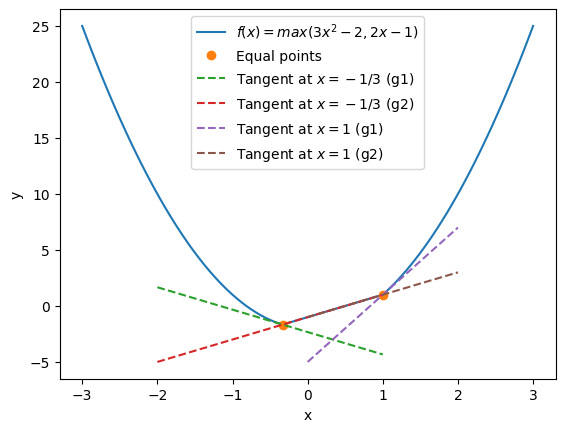

In [3]:
# Define the functions
x = np.linspace(-3, 3, 100)
y = np.maximum(3*x**2 - 2, 2*x - 1)
# Intersection points
points = np.array([[-1/3, -5/3],[1, 1]])
# Slopes at the intersection points
g1_prime_at_minus_1_3 = 6*(-1/3)
g2_prime_at_minus_1_3 = 2
g1_prime_at_1 = 6*1
g2_prime_at_1 = 2

# Define tangent lines at x = -1/3 and x = 1
def tangent_line(x, x0, y0, slope):
    return slope * (x - x0) + y0
# Create the plot
plt.plot(x, y, label='$f(x) = max(3x^2 - 2, 2x - 1)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Plot the intersection points
plt.plot(points[:,0], points[:,1], 'o', label='Equal points')

# Plot tangent lines at x = -1/3
x_tangent = np.linspace(-2, 1, 100)
plt.plot(x_tangent, tangent_line(x_tangent, -1/3, -5/3, g1_prime_at_minus_1_3), '--', label="Tangent at $x = -1/3$ (g1)")
plt.plot(x_tangent, tangent_line(x_tangent, -1/3, -5/3, g2_prime_at_minus_1_3), '--', label="Tangent at $x = -1/3$ (g2)")
# Plot tangent lines at x = 1
x_tangent = np.linspace(0, 2, 100)
plt.plot(x_tangent, tangent_line(x_tangent, 1, 1, g1_prime_at_1), '--', label="Tangent at $x = 1$ (g1)")
plt.plot(x_tangent, tangent_line(x_tangent, 1, 1, g2_prime_at_1), '--', label="Tangent at $x = 1$ (g2)")

# Show the plot
plt.legend()
plt.show()



5. A linear program is defined as:
$$\begin{aligned}
\underset{x}{\text {maximize}} \quad &c^Tx \\ 
\text{subject to} \quad &Gx \leq h \\ 
&Ax = b \\ 
\end{aligned}$$

a. (10 points) Write down the Lagrange dual function for this problem and define the variables.
b. (5 points) Write down the dual problem for this $LP$.
c. (5 points) Suppose you solved the dual problem and obtained an optimal value $d_*$. Assuming the primal is feasible and bounded, how does $d_*$ relate to the solution of the primal problem $p_*$? Explain why.

a. First we apply lagrange multipliers in the primal problem 
$$L(x, \lambda, \gamma) = c^Tx - \lambda (Gx-h) + \gamma (Ax-b) $$
where $\lambda$ and $\gamma$ are the Lagrange multipliers.
Then we get the lagrange dual function:
$$g(\lambda, \gamma) = \underset{x \in D}{\text{inf}} L(x, \lambda, \gamma)$$
$$  =\underset{x \in D}{\text{inf}} (c^Tx - \lambda (Gx-h) + \gamma (Ax-b)) $$

b. The dual problem for this $LP$ is:
$$\begin{aligned}
\underset{\lambda, \gamma}{\text {minimize}} \quad &g(\lambda, \gamma) \\ 
\text{subject to} \quad &\lambda \geq 0 \\ 
\end{aligned}$$

c. $d_* \leq p_*$ which is the optimal value of the dual problem is less than or equal to the optimal value of the primal problem. 
This is because the dual problem is a minimization problem, and the optimal value of the dual problem is the minimum of the objective function $g(\lambda, \gamma)$ over all feasible values of $\lambda$ and $\gamma$. Therefore, if the primal problem is feasible and bounded, then the dual problem is also feasible and bounded, and the optimal value of the dual problem is less than or equal to the optimal value of the primal problem.

$$A(x) = \underset{\lambda, \gamma}{\text{max}} L(x, \lambda, \gamma) \geq L(x, \lambda, \gamma) \geq \underset{x}{\text{min}} L(x,\lambda, \gamma) = B(\lambda, \gamma) $$
$$A(x) \geq min A(x) \geq maxB(\lambda, \gamma) \geq B(\lambda, \gamma) $$
$$A(x) \geq p_* \geq d_* \geq B(\lambda, \gamma) $$

Therefore, $p_* \geq d_*$

## Implementation
1. Descent Methods: Here you will implement two descent methods and compare them.

In [4]:
# a. Implement backtracking line search for functions of the form f(x) : R → R. Set
# α = 0.1 and β = 0.6. Submit your code as backtracking.py in your zip file.

def backtracking_line_search(f, grad_f, x, delta_x, alpha=0.1, beta=0.6):
    
    """
    :param f:  function (input is a np array, output is a scalar)
    :param grad_f: the gradient of f(x) (input of a np array, output is a np array which has the same shape as x)
    :param x: current point
    :param delta_x: the direction to decent
    :param alpha: 
    :param beta: 
    :return: t the step size
    """
    
    t = 1 #initialize step size
    
    f_x = f(x)
    grad_f_x = grad_f(x)
    
    while f(x + t*delta_x) > f_x + alpha*t*np.dot(grad_f_x.T, delta_x):
        t *= beta # update step size
    return t

# b
